In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **1. 손코딩 진행순서**
## 1) processing & EDA
-   데이터 int화
-   간단하게 corr 확인
## 2) Modeling
- train, test 분리
- model(X, W, b) 선언
- loss
- GD
- MSE
## 3) Train
- lr 설정
- loss값 gd로 학습
## 4) Test
- update된 w,b를 test set에 input
- 시각화

# **2. sklearn**
## 1) processing
- train test 분리
## 2) modelling
- model = LinearRegression()
## 3) train
- model.fit(X_train, y_train)
## 4) test
- predictions = model.predict(X_test)으로 학습
- mse = mean_squared_error(y_test, predictions)로 MSE 저장

![결과](./result.png "결과")

In [10]:
# Q) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [11]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Processing & EDA

### Processing

In [12]:
# str 형태가 있기 때문에 get_dummies()로 int형으로 자료형 변환
# https://kkokkilkon.tistory.com/37 참고

tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [13]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [ ]:
# macbookPrice처럼 한다면 x가 12개나 되기 때문에 식이 너무 복잡해질 것 같다.
# 다변수 일차방정식 다시 말해, 선형 방정식을 어떻게 해결할 수 있을까?
# 맞추고자 하는 값이 연속된 실수 값이기 때문에 
# 위의 문제는 선형 회귀를 통해 해결 가능할 것으로 보인다.

### 시각화

![다른 표기법](./other.png "표기")

<AxesSubplot:>

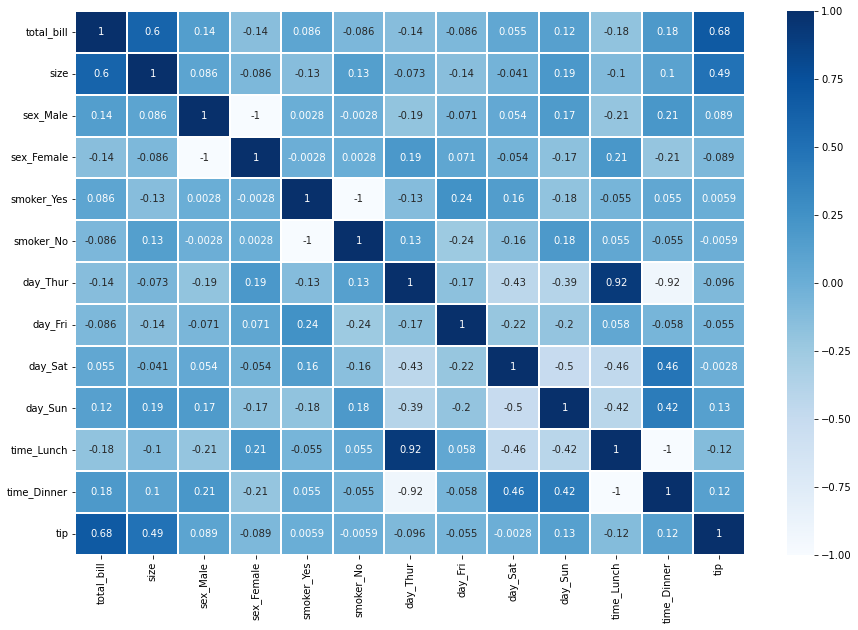

In [28]:
plt.subplots(figsize=(15,10))
sns.heatmap(tips.corr(), annot=True, linewidths=2, cmap = 'Blues')

In [ ]:
# 다차원이기 때문에 시각화에 한계가 있다.

## Modeling

In [29]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
#       2차원           1차원
print(X_test.shape, y_test.shape)
#       2차원           1차원

W = np.random.rand(12) # 길이가 12인 w 1개
b = np.random.rand() # 길이가 1인 b 1개

W,b

(195, 12) (195,)
(49, 12) (49,)


(array([0.90262582, 0.11851961, 0.96884807, 0.07343285, 0.48495111,
        0.29304167, 0.05161229, 0.01618401, 0.82891924, 0.13978982,
        0.0204229 , 0.85102919]),
 0.9117523488010757)

In [34]:
## 대략적인 모델을 만들어보자
# model, MSE, loss 만들기

def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
        # predictions += X[:, i] * W[i]
        # predictions = predictions + X[:, i] * W[i]
        # predictions = predictions + 각 X[:,i] * W[i]
        
        # x = [[1, 2, 3],
        #     [4, 5, 6],
        #     [7, 8, 9]]
        
        # if i == 1
        # [2, 5, 8]

    predictions += b
    return predictions

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)


dW: [844.93761126 100.99511428  24.7645134   11.36773366  14.57535465
  21.55689241   7.79043049   2.40746228  13.8445615   12.08979278
   8.30531334  27.82693372]
db: 36.13224706072329


## Train

In [35]:
LEARNING_RATE = 0.0001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 50.7651
Iteration 20 : Loss 8.2457
Iteration 30 : Loss 2.9463
Iteration 40 : Loss 2.2841
Iteration 50 : Loss 2.1998
Iteration 60 : Loss 2.1874
Iteration 70 : Loss 2.1840
Iteration 80 : Loss 2.1817
Iteration 90 : Loss 2.1796
Iteration 100 : Loss 2.1774
Iteration 110 : Loss 2.1753
Iteration 120 : Loss 2.1732
Iteration 130 : Loss 2.1711
Iteration 140 : Loss 2.1690
Iteration 150 : Loss 2.1669
Iteration 160 : Loss 2.1649
Iteration 170 : Loss 2.1628
Iteration 180 : Loss 2.1607
Iteration 190 : Loss 2.1586
Iteration 200 : Loss 2.1566
Iteration 210 : Loss 2.1545
Iteration 220 : Loss 2.1524
Iteration 230 : Loss 2.1504
Iteration 240 : Loss 2.1483
Iteration 250 : Loss 2.1463
Iteration 260 : Loss 2.1443
Iteration 270 : Loss 2.1422
Iteration 280 : Loss 2.1402
Iteration 290 : Loss 2.1382
Iteration 300 : Loss 2.1362
Iteration 310 : Loss 2.1341
Iteration 320 : Loss 2.1321
Iteration 330 : Loss 2.1301
Iteration 340 : Loss 2.1281
Iteration 350 : Loss 2.1261
Iteration 360 : Loss 2.1241


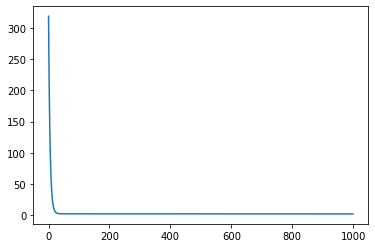

In [36]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [37]:
W, b

(array([ 0.03216413, -0.00253655,  0.87998736,  0.08280089,  0.43233706,
         0.26616305,  0.07072248,  0.01387823,  0.74741463,  0.12499735,
         0.040324  ,  0.75163542]),
 0.8322596801131954)

## Test

In [38]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.6483270220419084

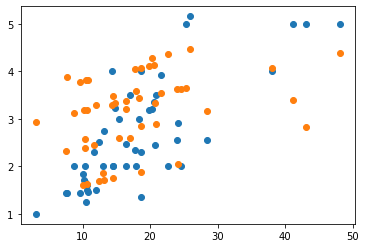

In [39]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# Sklearn

## Data Setting

In [52]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [53]:
model = LinearRegression()

## Train

In [54]:
model.fit(X_train, y_train)


LinearRegression()

## Test

In [55]:
predictions = model.predict(X_test)
predictions

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

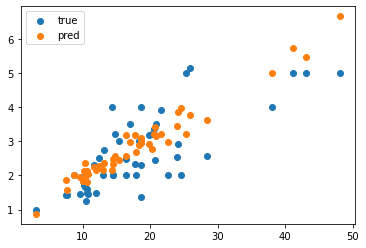

In [56]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()